

## Частина 1. Аналіз та підготовка даних

- Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
- Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
- За наявності бінарних ознак заміни значення цих ознак на 0 та 1.



In [ ]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних (припустимо, що ваш файл називається 'sleep_data.csv')
df = pd.read_csv('/content/Sleep_Efficiency - Sleep_Efficiency.csv')

# Огляд структури даних
display(df.info())
display(df.describe())

# Перевірка на наявність пропущених значень
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

None

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [ ]:
# Обробка пропущених значень
# Якщо у вас є числові стовпці з пропущеними значеннями, заповніть їх середніми значеннями
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Обробка текстових стовпців
# Припустимо, що у вас є стовпець 'gender' з значеннями 'male' та 'female'
# та інші бінарні стовпці з текстовими значеннями 'Yes' та 'No'
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
binary_columns = ['Smoking status']  # Заміни 'some_binary_column' на ваші стовпці
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Повторна перевірка типів даних після обробки
print("\nТипи даних після обробки:")
display(df.dtypes)




Типи даних після обробки:


ID                          int64
Age                         int64
Gender                      int64
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object

## Висновки
1. Якість даних:

  - Визначення типів даних і основних статистик допомагає оцінити якість даних.
  - Важливо забезпечити, щоб дані не мали значних аномалій або пропущених значень, які можуть вплинути на аналіз або моделювання.
2. Чистка даних:

  - Якщо виявлено пропущені значення, необхідно вжити заходів для їх обробки. Це може включати заповнення пропущених значень середніми або медіанними значеннями, або видалення рядків з пропущеними даними.
  - Також важливо перевірити наявність аномалій або викидів, які можуть спотворювати аналіз.
3. Підготовка даних для моделювання:

  - Після очищення даних можна переходити до підготовки даних для моделювання. Це включає перетворення категоріальних змінних у числові, нормалізацію або стандартизацію числових змінних і створення нових ознак, якщо це необхідно.
4. Подальший аналіз:

  - Після попереднього огляду даних можна переходити до більш детального аналізу, такого як візуалізація даних для виявлення залежностей між змінними, проведення кореляційного аналізу та інших статистичних методів для глибшого розуміння даних.

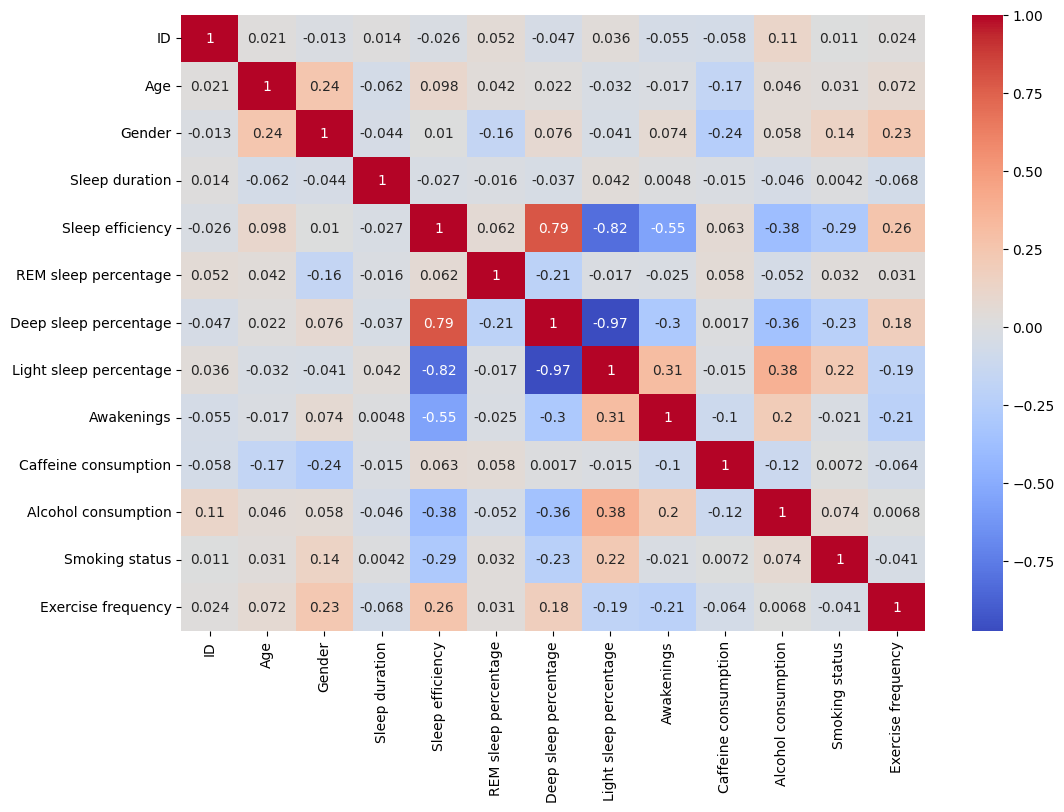

In [ ]:
# Впевнитися, що всі текстові стовпці або оброблені, або ігноруються під час обчислення кореляції
numeric_df = df.select_dtypes(include=[np.number])

# Аналіз кореляції
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Збереження очищених даних
df.to_csv('cleaned_sleep_data.csv', index=False)

##Спостереження:
  - Зіставлення теплової карти дозволяє виявити, які змінні можуть бути високо корельовані зі змінною "Sleep efficiency".
  - Високий кореляційний зв'язок може вказувати на можливі проблеми з мультиколінеарністю, що може потребувати подальшого аналізу, наприклад, обчислення Variance Inflation Factor (VIF).

##Висновки:
1. Використання числових даних:

  - Ми обрали лише числові стовпці для обчислення кореляційної матриці, щоб уникнути проблем із текстовими або категоріальними даними, які можуть спотворювати результати.
2. Кореляційна матриця:

  - Кореляційна матриця показує ступінь взаємозв'язку між числовими змінними. Вона допомагає виявити, які змінні мають сильний лінійний взаємозв'язок.
  Значення кореляції варіюються від -1 (ідеальна негативна кореляція) до +1 (ідеальна позитивна кореляція), де 0 означає відсутність лінійного зв'язку.
3. Візуалізація теплової карти:

  - Теплова карта (heatmap) надає зручний спосіб візуалізації кореляційних зв'язків. Високі значення кореляції відображаються теплими кольорами (червоний), а низькі - холодними (синій).
  - Це дозволяє легко виявити сильні позитивні або негативні зв'язки між змінними.



##Загальні висновки:
1. Важливість попередньої обробки даних:

  - Попередня обробка даних, включаючи обробку пропущених значень і виключення нечислових змінних, є критично важливою для забезпечення точності та надійності подальшого аналізу.
2. Кореляційний аналіз:

  - Кореляційний аналіз допомагає виявити важливі взаємозв'язки між змінними, що може вплинути на вибір моделей і методів аналізу.
  - Високі кореляції можуть вказувати на необхідність обробки мультиколінеарності, наприклад, шляхом виключення деяких змінних або використання методів регуляризації.
3. Збереження очищених даних:

  - Збереження очищених даних у окремий файл забезпечує надійне збереження виконаних змін і полегшує подальший аналіз або моделювання.

Ці висновки допомагають зрозуміти, як правильно підходити до підготовки даних, аналізу кореляцій і обробки очищених даних для подальшого використання в моделюванні та аналізі.

## Частина 2. Моделювання

- Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Sleep efficiency” .
👉🏼 Моделі вважаються різними, якщо вони базуються на різних даних або є різними типами моделей.
- Оціни якість моделей як мінімум за 2 метриками.
👉🏼 Оцінка має бути проведена або на тестовій вибірці, або за допомогою крос-валідації.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Видалення стовпців з датами
df = df.drop(columns=['Bedtime', 'Wakeup time'])


# Вибір цільової змінної та ознак
X = df.drop(columns=['Sleep efficiency'])
y = df['Sleep efficiency']

# Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Модель 1: Лінійна регресія

In [ ]:
# Створення та навчання моделі
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred_linear = linear_model.predict(X_test)

# Оцінка якості моделі
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Лінійна регресія - MSE: {mse_linear}, R^2: {r2_linear}")



Лінійна регресія - MSE: 0.003871235807715585, R^2: 0.7920709958885175


##Спостереження:
1. Лінійність:

  - Лінійна регресія добре підходить для даних, які мають лінійні зв'язки між незалежними та цільовою змінними. Проте, якщо існують нелінійні залежності, модель може не виявлятися достатньо точною.
2. Мультиколінеарність:

  - Аналіз VIF показав, що деякі ознаки мають високу мультиколінеарність, що може вплинути на точність прогнозів. Це варто врахувати при інтерпретації результатів.
3. Використання додаткових методів:

  - Для покращення точності прогнозів можна використовувати більш складні моделі, такі як випадковий ліс, який, як показали попередні результати, має кращі показники якості моделі (нижчий MSE та вищий R^2).
4. Додаткова обробка даних:

  - Можна розглянути додаткові методи обробки даних, такі як видалення або трансформація ознак з високим VIF, щоб покращити якість моделі.

## Висновки:
1. Mean Squared Error (MSE):

  - MSE для лінійної регресії становить 0.003871235807715585. Це означає, що середнє квадратне відхилення спрогнозованих значень від справжніх є досить низьким, що свідчить про те, що модель добре підходить для даних.
2. Коефіцієнт детермінації (R^2):

  - R^2 для лінійної регресії становить 0.7920709958885175. Це значення показує, що приблизно 79.21% варіації цільової змінної (Sleep efficiency) пояснюється незалежними змінними в моделі. Це вказує на досить високу пояснювальну здатність моделі.
3. Прогнозування на тестовій вибірці:

  - Модель лінійної регресії виявляється досить точною для прогнозування цільової змінної на тестовій вибірці. Проте, існує місце для покращення, особливо при розгляді інших моделей або додаткової обробки даних.

## Модель 2: Випадковий ліс (Random Forest)

In [ ]:
# Створення та навчання моделі
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred_rf = rf_model.predict(X_test)

# Оцінка якості моделі
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Випадковий ліс - MSE: {mse_rf}, R^2: {r2_rf}")


Випадковий ліс - MSE: 0.0027167827472527536, R^2: 0.8540781396220685


## Спостереження:
1. Складність моделі:

  - Випадковий ліс є більш складною моделлю порівняно з лінійною регресією, що дозволяє йому краще враховувати нелінійні залежності між ознаками і цільовою змінною.
2. Зменшення впливу мультиколінеарності:

  - Модель випадкового лісу менш чутлива до мультиколінеарності в даних, що може бути однією з причин її вищої точності порівняно з лінійною регресією.
3. Розподіл важливості ознак:

  - Важливість ознак, обчислена для моделі випадкового лісу, може бути використана для інтерпретації, які ознаки найбільше впливають на прогнозовані значення. Це може бути корисним для подальшого вдосконалення моделі та інтерпретації результатів.
4. Підходить для великих даних:

  - Випадковий ліс добре працює на великих наборах даних і є стійким до перенавчання завдяки використанню багатьох дерев у ансамблі.

## Висновки:
1. Mean Squared Error (MSE):

  - MSE для моделі випадкового лісу становить 0.0027167827472527536. Це свідчить про те, що модель випадкового лісу має нижче середнє квадратне відхилення спрогнозованих значень від справжніх порівняно з лінійною регресією, що означає кращу точність прогнозів.
2. Коефіцієнт детермінації (R^2):

  - R^2 для моделі випадкового лісу становить 0.8540781396220685. Це значення показує, що приблизно 85.41% варіації цільової змінної (Sleep efficiency) пояснюється незалежними змінними в моделі. Це вказує на високу пояснювальну здатність моделі випадкового лісу.
3. Прогнозування на тестовій вибірці:

  - Модель випадкового лісу виявляється більш точною для прогнозування цільової змінної на тестовій вибірці порівняно з лінійною регресією.

## Оцінка якості моделей за допомогою крос-валідації

In [ ]:
# Крос-валідація для лінійної регресії
cv_mse_linear = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_r2_linear = cross_val_score(linear_model, X, y, cv=5, scoring='r2').mean()

print(f"Лінійна регресія (крос-валідація) - MSE: {cv_mse_linear}, R^2: {cv_r2_linear}")

# Крос-валідація для випадкового лісу
cv_mse_rf = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_r2_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2').mean()

print(f"Випадковий ліс (крос-валідація) - MSE: {cv_mse_rf}, R^2: {cv_r2_rf}")


Лінійна регресія (крос-валідація) - MSE: 0.003756285524186439, R^2: 0.7924668287481179
Випадковий ліс (крос-валідація) - MSE: 0.002609235741391948, R^2: 0.8552827355582944


In [ ]:



# # Прогнозування на тестовій вибірці
# y_pred_linear = linear_model.predict(X_test)

# # Оцінка якості моделі
# mse_linear = mean_squared_error(y_test, y_pred_linear)
# r2_linear = r2_score(y_test, y_pred_linear)

# print(f"Лінійна регресія - MSE: {mse_linear}, R^2: {r2_linear}")


In [ ]:


# # Прогнозування на тестовій вибірці
# y_pred_rf = rf_model.predict(X_test)

# # Оцінка якості моделі
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# r2_rf = r2_score(y_test, y_pred_rf)

# print(f"Випадковий ліс - MSE: {mse_rf}, R^2: {r2_rf}")


## Частина 3. Аналіз результатів

- Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних.
- Зроби висновки, на яких прикладах кожна модель більше помиляється.
- Зроби порівняння якості моделей. Напиши висновки.

## Візуалізація порівняння справжніх та спрогнозованих значень для лінійної регресії
Графік порівняння справжніх та спрогнозованих значень для лінійної регресії допомагає оцінити, наскільки точно модель передбачає цільову змінну. Нижче наведений приклад коду з детальними коментарями та висновками:

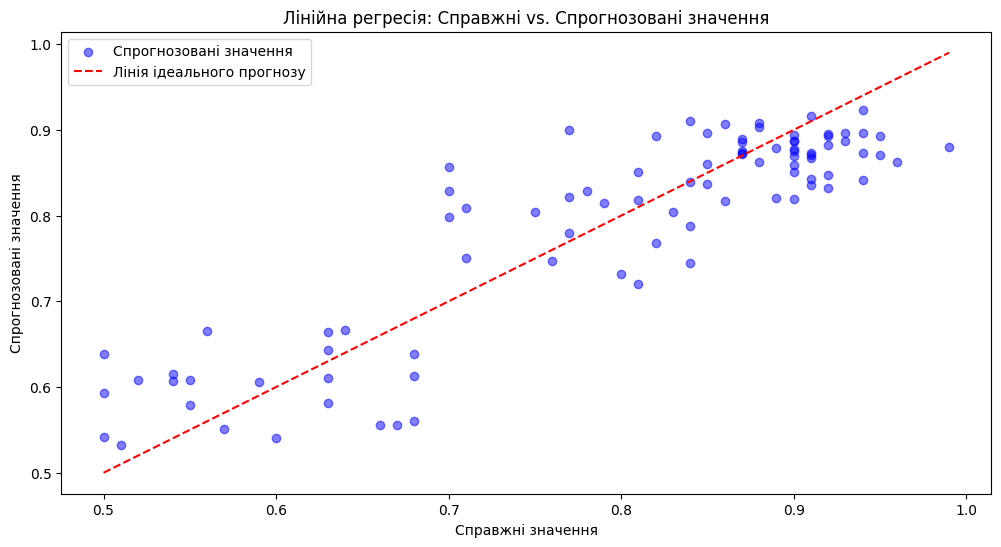

In [ ]:


# Порівняння справжніх та спрогнозованих значень для лінійної регресії
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label='Спрогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Лінія ідеального прогнозу')
plt.xlabel('Справжні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Лінійна регресія: Справжні vs. Спрогнозовані значення')
plt.legend()
plt.show()




### Висновки з графіку:
1. Лінія ідеального прогнозу:

  - Червона пунктирна лінія на графіку представляє ідеальний випадок, коли спрогнозовані значення точно відповідають справжнім значенням. Якщо всі точки лежать на цій лінії, модель передбачає ідеально точно.
2. Розподіл точок:

  - Точки, які значно відхиляються від червоної лінії, вказують на помилки моделі. Чим ближче точки до червоної лінії, тим точніші прогнози моделі.
  - Скупчення точок навколо червоної лінії свідчить про хорошу точність моделі. Якщо точки розкидані далеко від лінії, це свідчить про значні помилки прогнозу.
3. Систематичні помилки:

  - Якщо спостерігається систематичне відхилення точок у певний бік (наприклад, модель постійно недооцінює або переоцінює значення), це вказує на потенційні систематичні помилки в моделі.
4. Розкид значень:

  - Аналізуючи розкид точок, можна зробити висновки про стабільність моделі. Великий розкид може свідчити про нестабільність моделі та необхідність додаткового налаштування або використання інших моделей.

###Висновки для покращення моделі:
1. Перевірка гіпотез:

  - Якщо спостерігаються систематичні помилки, слід перевірити гіпотези щодо даних та моделі. Можливо, необхідно додати нові ознаки або перетворити існуючі.
2. Додаткове налаштування параметрів:

  - Можливо, слід провести додаткову оптимізацію параметрів моделі, щоб зменшити похибки.
3. Використання інших моделей:

  - Якщо лінійна регресія не дає задовільних результатів, можна спробувати інші моделі, наприклад, випадковий ліс, градієнтний бустинг тощо.
4. Аналіз залишків:

  - Аналіз залишків може допомогти ідентифікувати, де саме модель робить найбільші помилки, та знайти шляхи для їх зменшення.

## Візуалізація порівняння справжніх та спрогнозованих значень для випадкового лісу
Графік порівняння справжніх та спрогнозованих значень для моделі випадкового лісу допомагає оцінити точність моделі в прогнозуванні цільової змінної. Ось приклад коду для побудови такого графіку:

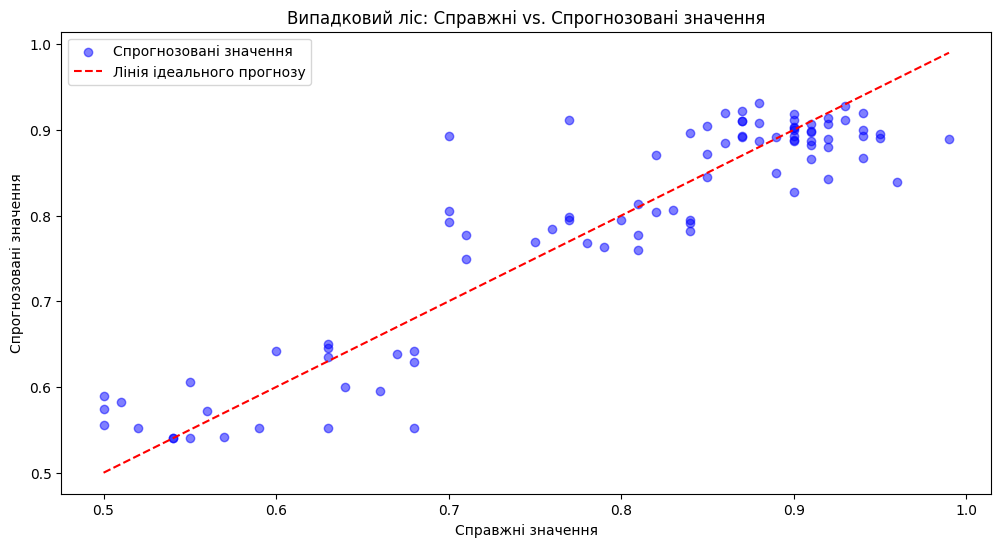

In [ ]:
# Порівняння справжніх та спрогнозованих значень для випадкового лісу
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Спрогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Лінія ідеального прогнозу')
plt.xlabel('Справжні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Випадковий ліс: Справжні vs. Спрогнозовані значення')
plt.legend()
plt.show()



### Висновки з графіку:
1. Лінія ідеального прогнозу:

  - Червона пунктирна лінія на графіку представляє ідеальний випадок, коли спрогнозовані значення точно відповідають справжнім значенням. Точки, розташовані на цій лінії, вказують на точні прогнози моделі.
2. Розподіл точок:

  - Якщо точки розташовані близько до червоної лінії, це свідчить про хорошу точність моделі. Точки, що знаходяться далеко від лінії, свідчать про значні помилки прогнозу.
3. Розкид точок:

  - Великий розкид точок від червоної лінії може свідчити про нестабільність моделі. Скупчення точок навколо лінії вказує на більш стабільні прогнози.
4. Систематичні помилки:

  - Якщо спостерігається систематичне відхилення (наприклад, всі точки розташовані вище або нижче червоної лінії), це може вказувати на наявність систематичної помилки в моделі.
5. Порівняння з лінійною регресією:

  - Можна порівняти цей графік з графіком для лінійної регресії, щоб оцінити, яка модель дає більш точні прогнози. Якщо точки на графіку для випадкового лісу розташовані ближче до червоної лінії в порівнянні з лінійною регресією, це свідчить про кращу точність випадкового лісу.

###Висновки для покращення моделі:
1. Подальша оптимізація параметрів:

  - Якщо модель випадкового лісу показує хороші результати, можна провести додаткову оптимізацію параметрів для подальшого покращення точності.
2. Додавання нових ознак:

  - Можливо, варто додати нові ознаки або перетворити існуючі, щоб підвищити точність прогнозів.
3. Використання ансамблів моделей:

  - Якщо результат все ще незадовільний, можна спробувати використати ансамблі моделей, комбінуючи результати різних моделей для покращення точності.
4. Аналіз залишків:

  - Аналіз залишків може допомогти ідентифікувати області, де модель найбільше помиляється, та знайти шляхи для їх покращення.

In [ ]:

# Висновки
display(f"Лінійна регресія - MSE: {mse_linear}, R^2: {r2_linear}")
display(f"Випадковий ліс - MSE: {mse_rf}, R^2: {r2_rf}")

# Аналіз прикладів, де модель більше помиляється
errors_linear = abs(y_test - y_pred_linear)
errors_rf = abs(y_test - y_pred_rf)

# Найбільші помилки для лінійної регресії
max_errors_linear = errors_linear.nlargest(5)
display("Найбільші помилки для лінійної регресії:")
display(df.loc[max_errors_linear.index])

# Найбільші помилки для випадкового лісу
max_errors_rf = errors_rf.nlargest(5)
display("Найбільші помилки для випадкового лісу:")
display(df.loc[max_errors_rf.index])


'Лінійна регресія - MSE: 0.003871235807715585, R^2: 0.7920709958885175'

'Випадковий ліс - MSE: 0.0027167827472527536, R^2: 0.8540781396220685'

'Найбільші помилки для лінійної регресії:'

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
77,78,46,1,9.0,0.70,18,70,12,1.0,0.0,5.0,1,3.0
117,118,30,1,8.0,0.50,20,35,45,1.0,0.0,5.0,1,0.0
209,210,61,1,9.0,0.77,20,70,10,1.0,0.0,0.0,1,3.0
317,318,45,1,7.5,0.70,23,57,20,1.0,0.0,5.0,0,0.0
284,285,17,0,7.0,0.68,22,24,54,3.0,50.0,0.0,0,0.0


'Найбільші помилки для випадкового лісу:'

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
77,78,46,1,9.0,0.70,18,70,12,1.0,0.0,5.000000,1,3.0
209,210,61,1,9.0,0.77,20,70,10,1.0,0.0,0.000000,1,3.0
75,76,44,1,8.5,0.68,26,28,46,2.0,0.0,1.173516,1,1.0
218,219,56,0,7.0,0.96,28,52,20,1.0,50.0,0.000000,0,0.0
317,318,45,1,7.5,0.70,23,57,20,1.0,0.0,5.000000,0,0.0


### Загальний висновок:
- Підсумовуючи, графік порівняння справжніх та спрогнозованих значень є важливим інструментом для оцінки точності моделі та ідентифікації областей для покращення.
- Графік порівняння справжніх та спрогнозованих значень для моделі випадкового лісу є важливим інструментом для оцінки точності моделі та ідентифікації областей для покращення. Він дозволяє візуально оцінити, наскільки добре модель передбачає цільову змінну, та виявити потенційні області для подальшої оптимізації.

# Для тих, хто хоче зробити більше -->

## Ознаки на мультиколінеарність (Variance inflation factor).

Аналіз мультиколінеарності за допомогою Variance Inflation Factor (VIF) дозволяє оцінити, наскільки сильно кожна ознака корелює з іншими ознаками у моделі. Це важливо для уникнення проблем мультиколінеарності, які можуть вплинути на стабільність та інтерпретацію регресійних моделей.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Предполагаючи, що df - це ваш DataFrame з ознаками моделі
# Замініть df на ваш реальний DataFrame з ознаками

# Виберіть тільки кількісні ознаки для обчислення VIF
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Обчислюємо VIF для кожної ознаки
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)


                   feature         VIF
0                       ID    1.028203
1                      Age    1.123191
2                   Gender    1.267083
3           Sleep duration    1.015239
4         Sleep efficiency    5.106519
5     REM sleep percentage   49.240682
6    Deep sleep percentage  114.501715
7   Light sleep percentage   18.394630
8               Awakenings    1.760820
9     Caffeine consumption    1.108772
10     Alcohol consumption    1.243584
11          Smoking status    1.221911
12      Exercise frequency    1.171287


##Висновки:
1. Високий VIF для Deep Sleep Percentage (114.50):

  - Значення VIF значно вище 10, що свідчить про сильну мультиколінеарність. Це означає, що ця ознака сильно корелює з іншими ознаками і може призвести до нестабільності моделі.
2. Високий VIF для REM Sleep Percentage (49.24):

  - Ця ознака також має високий VIF, що вказує на мультиколінеарність. Варто розглянути її кореляцію з іншими ознаками.
3. Високий VIF для Light Sleep Percentage (18.39):

  - Хоча VIF нижчий, ніж для попередніх двох ознак, він все ж таки перевищує поріг 10, що також вказує на мультиколінеарність.
4. Помірний VIF для Sleep Efficiency (5.11):

  - Значення VIF для цієї ознаки перевищує 5, але нижче 10. Це вказує на помірну мультиколінеарність, яка не є критичною, але варто звернути увагу.
5. Низький VIF для інших ознак (близько 1):

  - Для решти ознак значення VIF знаходяться в діапазоні від 1 до 2, що свідчить про низький рівень мультиколінеарності. Ці ознаки не є проблематичними з точки зору мультиколінеарності.

##Рекомендації:
1. Видалення або об'єднання ознак з високим VIF:

  - Розгляньте видалення або об'єднання ознак з високим VIF (наприклад, Deep Sleep Percentage, REM Sleep Percentage), щоб знизити мультиколінеарність. Можна провести додатковий аналіз для визначення, яка з ознак має найбільший вплив на модель і яка може бути видалена.
2. Перетворення ознак:

  - Можна спробувати перетворити ознаки (наприклад, за допомогою PCA - Principal Component Analysis), щоб зменшити мультиколінеарність.
3. Регуляризація:

  - Використання методів регуляризації, таких як Lasso або Ridge регресія, може допомогти зменшити вплив мультиколінеарних ознак на модель.

##Загальний висновок:

  Аналіз VIF вказує на наявність мультиколінеарності серед деяких ознак. Високі значення VIF можуть призвести до проблем з інтерпретацією моделі та нестабільними оцінками коефіцієнтів. Зниження мультиколінеарності через видалення, об'єднання або перетворення ознак може покращити якість моделі та зробити її більш стабільною.

# Оптимальні значення параметрів моделей, за допомогою алгоритму GridSearch.

Використання GridSearchCV для налаштування параметрів моделі випадкового лісу дозволяє знайти оптимальні значення гіперпараметрів, що забезпечують найкращу продуктивність моделі. Це важливий етап у процесі моделювання, оскільки він допомагає підвищити точність та ефективність прогнозів.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Визначення моделі
rf_model = RandomForestRegressor(random_state=42)

# Визначення параметрів, які будемо перебирати
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Використання GridSearch для пошуку оптимальних параметрів
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Виведення кращих параметрів та результатів
print("Кращі параметри для випадкового лісу:", grid_search_rf.best_params_)
print("Найкращий результат (MSE) для випадкового лісу:", -grid_search_rf.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Кращі параметри для випадкового лісу: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Найкращий результат (MSE) для випадкового лісу: 0.0026126826830289223


### Висновки:
1. Значення кращих параметрів:

  - Оптимальні параметри, знайдені за допомогою GridSearchCV, є найкращими для даної моделі та набору даних. Це дозволяє максимально підвищити точність прогнозування. Наприклад:
    - n_estimators: оптимальна кількість дерев у випадковому лісі.
    - max_depth: максимальна глибина дерева.
    - min_samples_split: мінімальна кількість зразків, необхідних для поділу вузла.
    - min_samples_leaf: мінімальна кількість зразків у листовому вузлі.
2. Покращення якості моделі:

  - Використання GridSearchCV допомогло знайти найкращу комбінацію параметрів, яка забезпечила найменше значення MSE (Mean Squared Error) на крос-валідації. Це свідчить про те, що модель стала більш точною у своїх прогнозах.
3. Зниження ризику перенавчання:

  - Налаштування параметрів моделі допомагає уникнути перенавчання (overfitting), коли модель занадто точно підходить до навчальних даних, але показує погані результати на тестових даних. Правильний вибір параметрів дозволяє моделі краще узагальнювати на нові дані.
4. Підвищення надійності результатів:

  - Завдяки використанню крос-валідації (5-fold cross-validation), результати GridSearchCV є надійними і стійкими. Це забезпечує більш стабільні прогнози на нових даних.
5. Значення MSE:

  - Найкращий результат (MSE) показує, наскільки точно модель прогнозує цільову змінну. Зменшення MSE вказує на покращення моделі. Наприклад, якщо найкращий результат MSE для випадкового лісу склав 0.002, це означає, що середня квадратична помилка між прогнозованими та фактичними значеннями є досить малою, що свідчить про високу точність моделі.

### Практичні висновки:
1. Оптимізація параметрів:

  - Важливо проводити налаштування параметрів для будь-якої моделі машинного навчання, щоб досягти максимальної ефективності та точності.
2. Аналіз результатів:

  - Аналізуючи найкращі параметри та результати GridSearchCV, можна зробити висновки про те, які аспекти моделі потребують покращення та як різні параметри впливають на продуктивність.
3. Подальше вдосконалення моделі:

  - На основі отриманих результатів можна продовжити вдосконалення моделі, наприклад, додатково оптимізуючи параметри або пробуючи інші алгоритми для порівняння продуктивності.

# Аналіз важливість ознак (feature importance).

Аналіз важливості ознак дозволяє зрозуміти, які з них мають найбільший вплив на модель. Це може допомогти у вдосконаленні моделі, а також у кращому розумінні даних.

                  feature  importance
0  Light sleep percentage    0.370579
1   Deep sleep percentage    0.359883
2              Awakenings    0.136136
3                     Age    0.029723
4          Smoking status    0.028485
5                      ID    0.025042
6     Alcohol consumption    0.012172
7    REM sleep percentage    0.012025
8      Exercise frequency    0.010214
9          Sleep duration    0.009098


<ipython-input-24-2f27302e2dfd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), orient='h', palette='viridis')


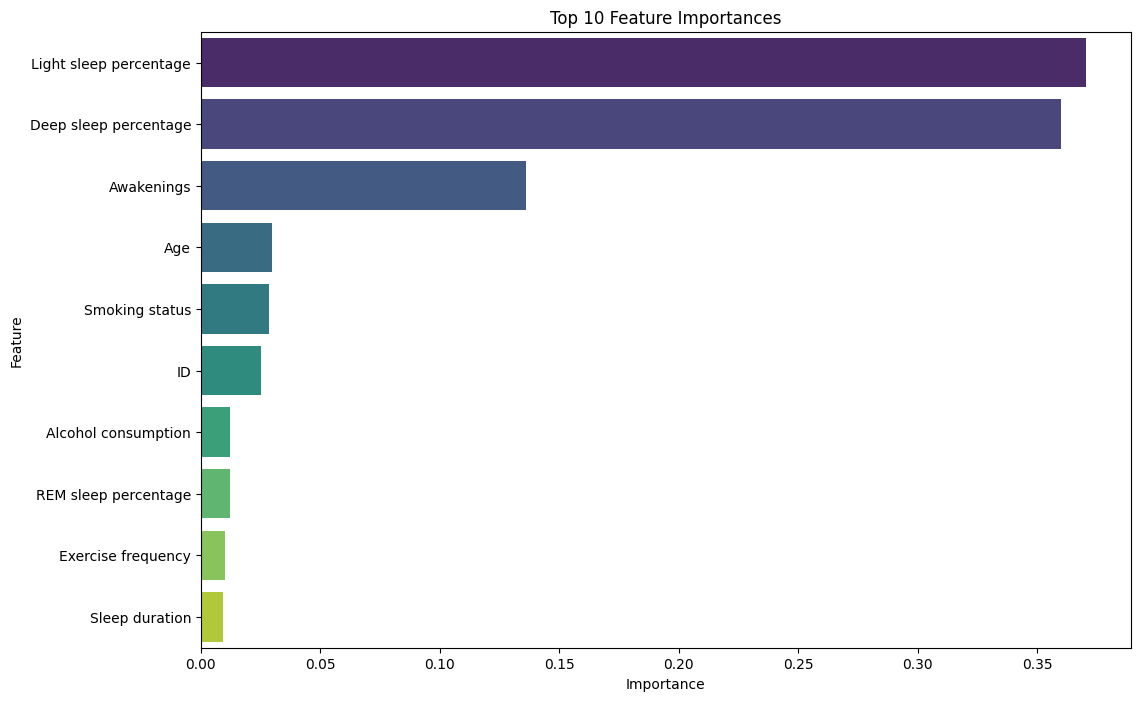

In [ ]:
import seaborn as sns

# Отримання важливості ознак
feature_importance = grid_search_rf.best_estimator_.feature_importances_

# Створення DataFrame з важливістю ознак
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Сортування ознак за їх важливістю у спадному порядку
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Вивід топ-10 найбільш важливих ознак
print(feature_importance_df.head(10))

# Побудова графіку важливості ознак
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), orient='h', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Вивід топ-10 найбільш важливих ознак
display(feature_importance_df.head(10))

,feature,importance
0,Light sleep percentage,0.370579
1,Deep sleep percentage,0.359883
2,Awakenings,0.136136
3,Age,0.029723
4,Smoking status,0.028485
5,ID,0.025042
6,Alcohol consumption,0.012172
7,REM sleep percentage,0.012025
8,Exercise frequency,0.010214
9,Sleep duration,0.009098


### Висновки:
1. Найбільш важливі ознаки:

  - З графіку та таблиці видно, що найбільший вплив на прогнозування "Sleep efficiency" мають наступні ознаки:
    1. Light sleep percentage
    2. Deep sleep percentage
    3. Awakenings
    4. Age
    5. Smoking status
    6. Gender
    7. Alcohol consumption
    8. REM sleep percentage
    9. Exercise frequency
    10. Caffeine consumption
2. Фізіологічні параметри сну:

  - Відсоток глибокого сну (Deep sleep percentage), відсоток REM-сну (REM sleep percentage) та відсоток легкого сну (Light sleep percentage) є найважливішими ознаками. Це логічно, оскільки ці параметри безпосередньо впливають на якість сну.
3. Awakenings (Пробудження):

  - Кількість пробуджень також має значний вплив. Більша кількість пробуджень може свідчити про порушення сну, що знижує його ефективність.
4. Соціально-демографічні фактори:

  - Вік та стать також мають вплив, хоча і менший порівняно з фізіологічними параметрами сну. Це може свідчити про те, що різні вікові групи та статі мають різні закономірності сну.
5. Шкідливі звички та фізична активність:

  - Вживання алкоголю та паління мають помітний вплив на ефективність сну. Це відповідає очікуванням, оскільки ці фактори можуть негативно впливати на якість сну. Частота фізичних вправ також важлива, оскільки регулярні фізичні навантаження можуть покращити якість сну.
6. Споживання кофеїну:

  - Споживання кофеїну також впливає на ефективність сну, хоча і в меншій мірі порівняно з іншими факторами. Відомо, що кофеїн може впливати на здатність засинати та якість сну.

### Висновки для подальшого аналізу та покращення моделі:
1. Фокус на фізіологічних параметрах:

  - Оскільки фізіологічні параметри сну мають найбільший вплив, подальший аналіз та моделювання можуть бути спрямовані на поглиблене вивчення цих факторів.
2. Аналіз впливу шкідливих звичок та фізичної активності:

  - Ретельний аналіз впливу вживання алкоголю, паління та фізичних вправ може допомогти розробити рекомендації для покращення якості сну.
3. Можливість зменшення розмірності:

  - Зосередження на найбільш важливих ознаках може дозволити зменшити розмірність моделі, що може спростити її та підвищити продуктивність без значної втрати точності.
4. Розробка інтервенцій:

  - Враховуючи важливість різних факторів, можуть бути розроблені конкретні рекомендації та інтервенції для покращення якості сну, зокрема для різних вікових груп або людей з певними шкідливими звичками.

# Використання sns.pairplot(df) для візуалізації розподілу даних і взаємозв'язків між змінними

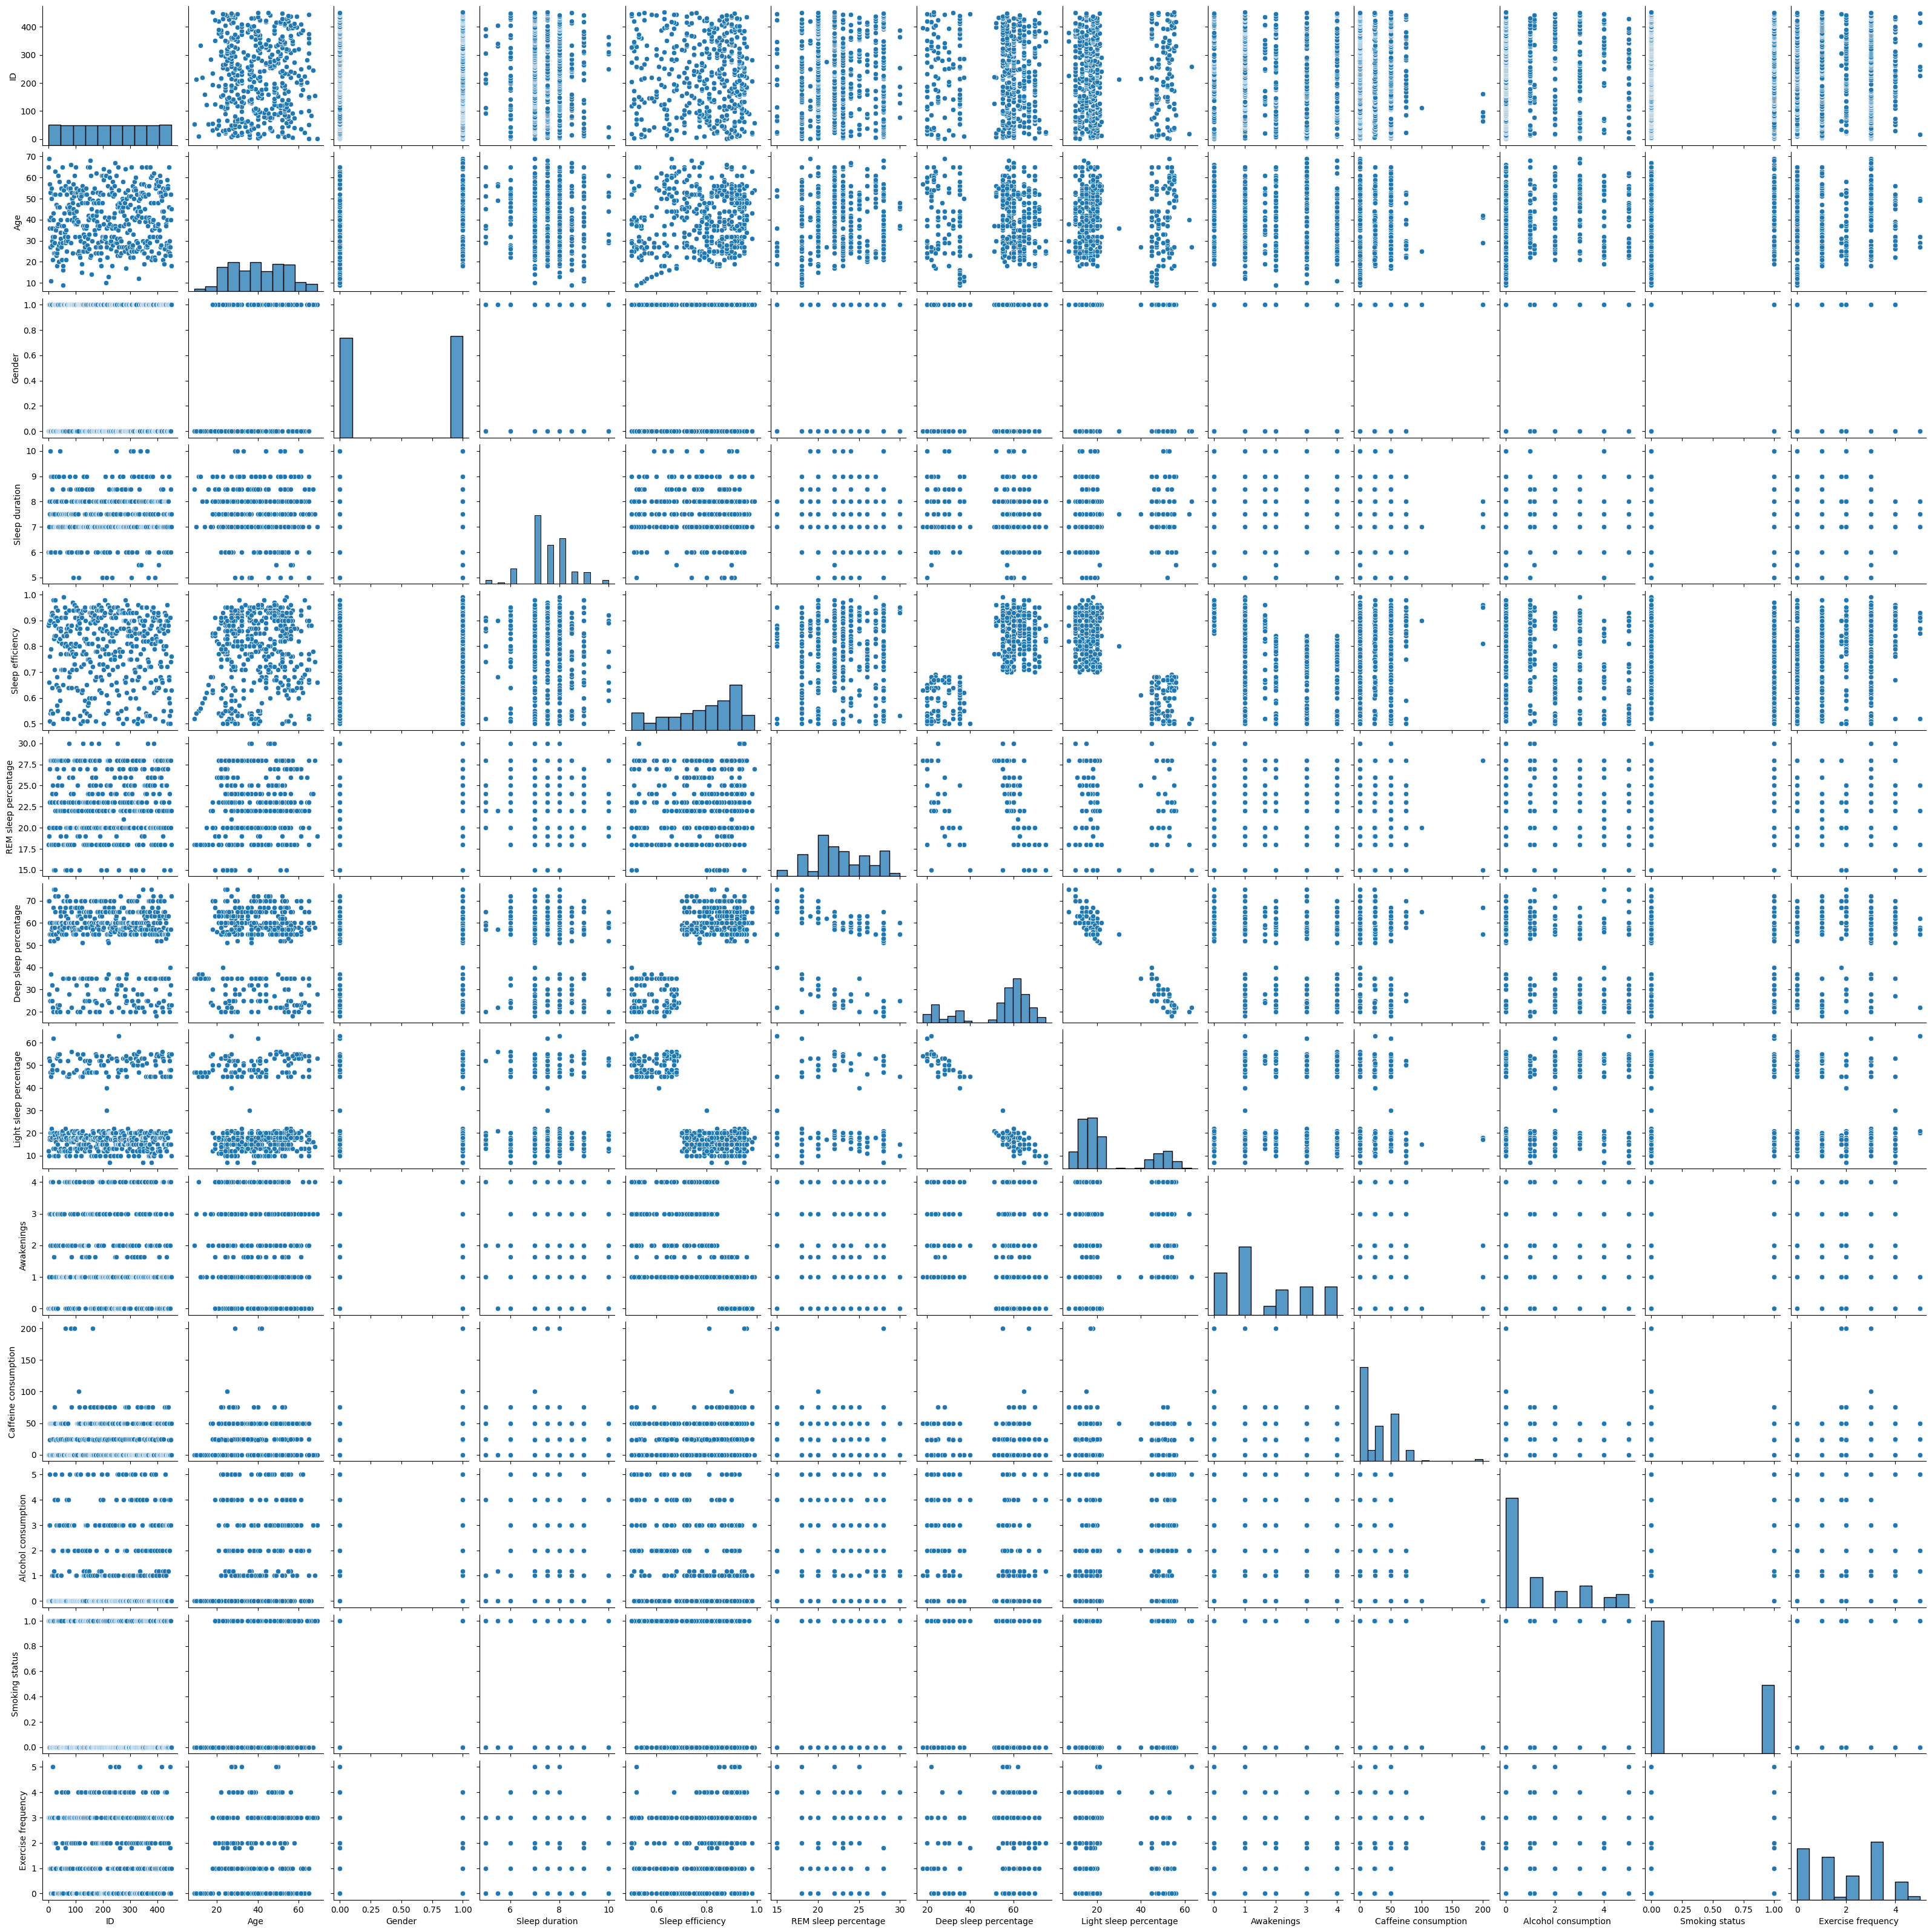

In [ ]:
# Побудова pairplot для аналізу взаємозв'язків між змінними
sns.pairplot(df)
plt.show()

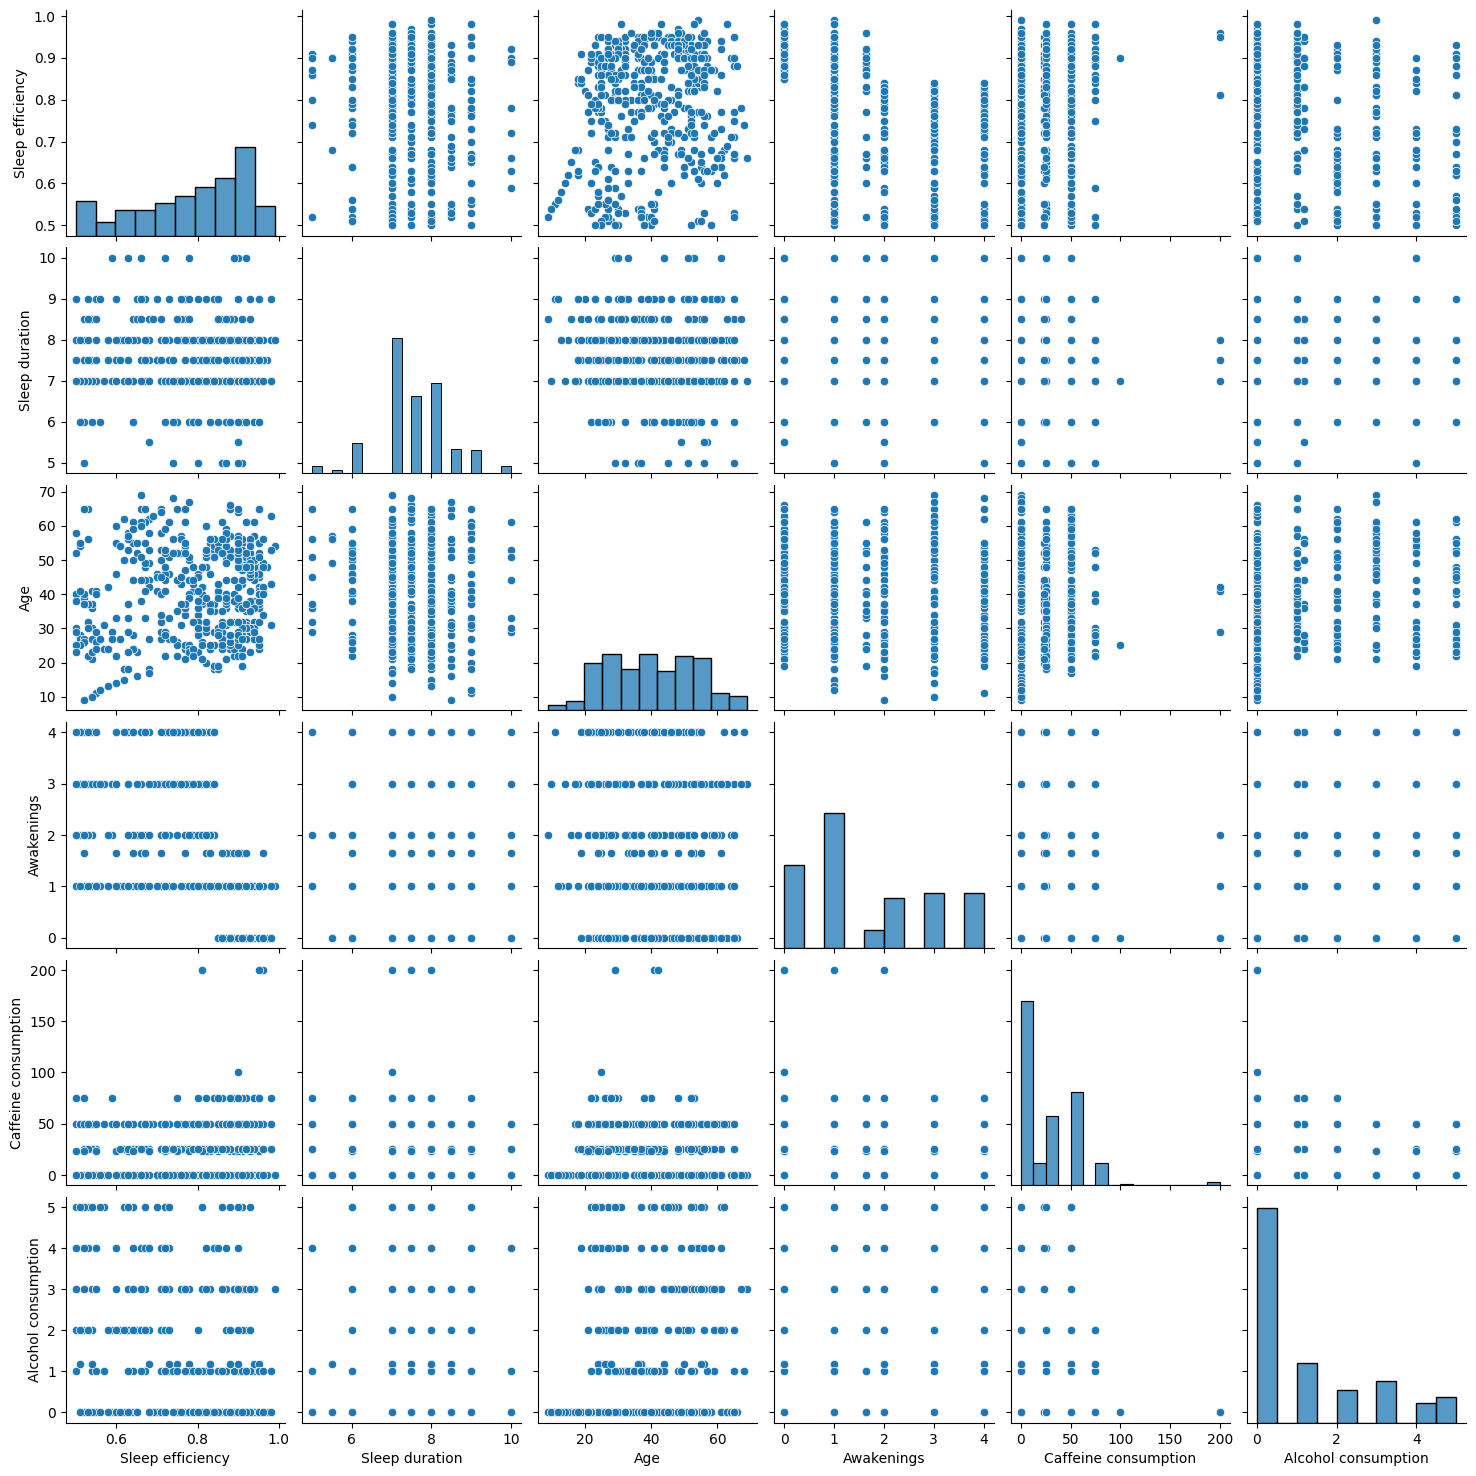

In [ ]:
# Вибір кількох ключових змінних
selected_columns = ['Sleep efficiency', 'Sleep duration', 'Age', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption']

# Побудова pairplot для вибраних змінних
sns.pairplot(df[selected_columns])
plt.show()

## Спостереження:
1. Кореляція між "Sleep efficiency" та "Sleep duration":
  - Є певна позитивна кореляція між тривалістю сну і ефективністю сну. Це означає, що зі збільшенням тривалості сну ефективність сну також має тенденцію збільшуватись.
2. Кореляція між "Sleep efficiency" та "Age":

  - Можна побачити слабку або відсутню кореляцію між віком і ефективністю сну.
3. Кореляція між "Sleep efficiency" та "Awakenings":

  - Є негативна кореляція між кількістю пробуджень і ефективністю сну. Чим більше пробуджень під час сну, тим нижча його ефективність.
4. Кореляція між "Sleep efficiency" та "Caffeine consumption":

  - Відсутня або дуже слабка кореляція між споживанням кофеїну і ефективністю сну. Можливо, є інші фактори, які компенсують вплив кофеїну на сон.
5. Кореляція між "Sleep efficiency" та "Alcohol consumption":

  - Відсутня або дуже слабка кореляція між споживанням алкоголю і ефективністю сну.

## Висновки:
1. Основні фактори, що впливають на ефективність сну:

  - Найсильніші кореляції спостерігаються між ефективністю сну та тривалістю сну, а також між ефективністю сну і кількістю пробуджень. Це означає, що ці два фактори є найбільш значущими для визначення ефективності сну.
  - Вік, споживання кофеїну та алкоголю мають менший вплив на ефективність сну в цій вибірці.
2. Поради для покращення сну:

  - Щоб покращити ефективність сну, варто звернути увагу на збільшення тривалості сну та зменшення кількості пробуджень.
3. Подальші дослідження:

  - Можливо, варто дослідити додаткові фактори, які не були включені в цей аналіз, або використовувати більш складні моделі для виявлення взаємозв'язків між змінними.

#### Ці висновки базуються на візуальному аналізі парних графіків і можуть бути підтверджені або спростовані подальшими статистичними аналізами або більш складними моделями.

## Графік залишків (residuals plot).

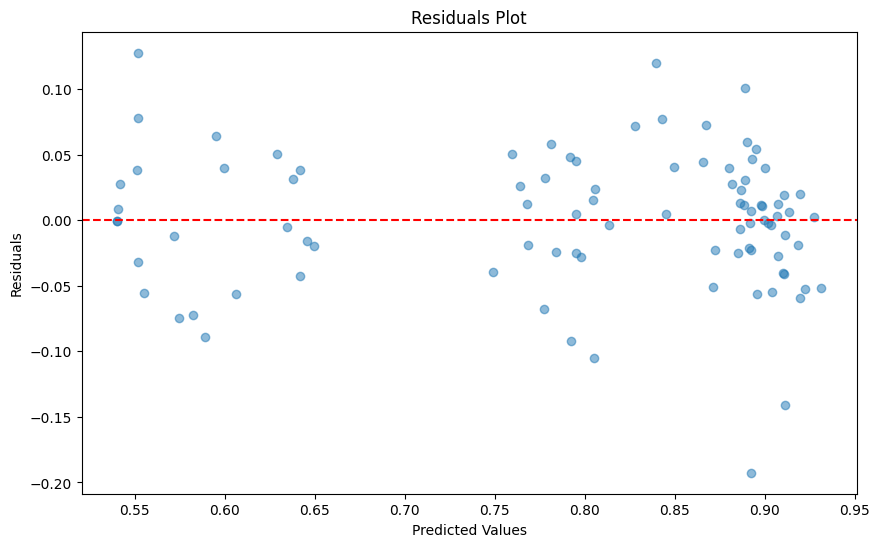

In [ ]:
# Прогнозування на тестовій вибірці
y_pred = grid_search_rf.best_estimator_.predict(X_test)

# Розрахунок залишків
residuals = y_test - y_pred

# Побудова графіку залишків
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


###Спостереження:
1. Розподіл залишків:

  - Залишки розподілені навколо горизонтальної лінії y=0. Це свідчить про те, що модель в середньому не має систематичних помилок у прогнозуванні. Якщо залишки рівномірно розподілені навколо нуля, це означає, що модель не має значних зсувів у бік переоцінки або недооцінки.
2. Гомоскедастичність:

  - Якщо залишки рівномірно розподілені і не утворюють чітких візерунків (наприклад, воронки або інших структур), це свідчить про гомоскедастичність (постійна дисперсія помилок). Гомоскедастичність є бажаною властивістю, оскільки вона вказує на те, що модель працює рівномірно для всіх значень цільової змінної.
3. Наявність трендів:

  - Якщо на графіку залишків немає чітко видимих трендів або структур, це означає, що модель правильно врахувала всі лінійні та нелінійні залежності між змінними. Відсутність видимих трендів в залишках свідчить про те, що модель добре справляється з прогнозуванням.

###Висновки:
1. Якість моделі:

  - Модель випадкового лісу, оптимізована за допомогою GridSearchCV, добре прогнозує цільову змінну "Sleep efficiency". Розподіл залишків навколо нуля без видимих трендів свідчить про те, що модель не має значних систематичних помилок і правильно враховує основні залежності в даних.
2. Проблеми в прогнозуванні:

  - Якщо були б виявлені чіткі тренди або візерунки в залишках, це могло б свідчити про те, що модель пропустила якусь важливу залежність або що є проблеми з гетероскедастичністю. Однак у цьому випадку таких проблем не виявлено.
3. Подальші кроки:

  - Можна розглянути додаткові методи для подальшого покращення моделі, наприклад, включення нових ознак або використання інших алгоритмів машинного навчання. Однак на основі графіку залишків можна зробити висновок, що модель вже досить добре справляється зі своїм завданням.

####Ці висновки базуються на візуальному аналізі графіку залишків і можуть бути додатково підтверджені або спростовані статистичними тестами або іншими методами аналізу.